In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Prueba 1: sin función de coste

In [3]:
path = "results/sphere_match_list_results.txt"
# txt columnas separadas por espacio y tienen nombre id id id_match mass_original mass_match distance_ckpc/h
data = pd.read_csv(path, sep=" ", names=["id", "id_match", "mass_original", "mass_match", "distance_ckpc/h"])
#quitar primera fila
data = data.iloc[1:]

#convertir columnas mass_original y mass_match a float
data['mass_original'] = data['mass_original'].astype(float)
data['mass_match'] = data['mass_match'].astype(float)
#convertir las dos primeras columnas a int
data['id'] = data['id'].astype(int)
data['id_match'] = data['id_match'].astype(int)

data.head()


,id,id_match,mass_original,mass_match,distance_ckpc/h
1,117251,3431,365.970703,324.060211,32.162353515625
2,117251,3430,365.970703,3208.470459,845.8616333007812
3,117251,3432,365.970703,83.478668,1200.50390625
4,117251,11657,365.970703,329.085968,2933.928466796875
5,117251,15548,365.970703,134.839233,4121.82470703125


In [4]:
# Calcular la diferencia de masa relativa
data['diff_mass'] = np.abs(data['mass_original'] - data['mass_match'])

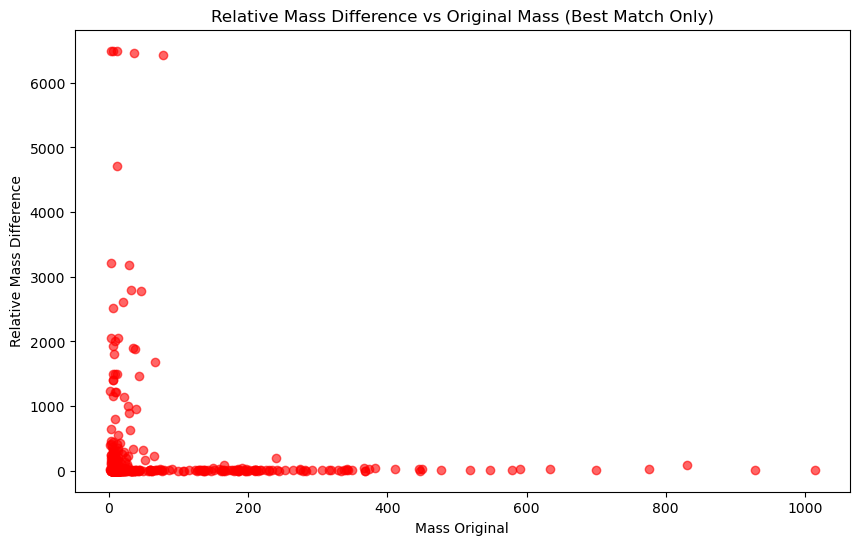

In [5]:
# Filter to keep only the first match (best match) for each original subhalo
data_best = data.drop_duplicates(subset='id', keep='first')

plt.figure(figsize=(10, 6))
plt.scatter(data_best['mass_original'], data_best['diff_mass'], color='r', alpha=0.6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Relative Mass Difference')
plt.title('Relative Mass Difference vs Original Mass (Best Match Only)')
plt.show()

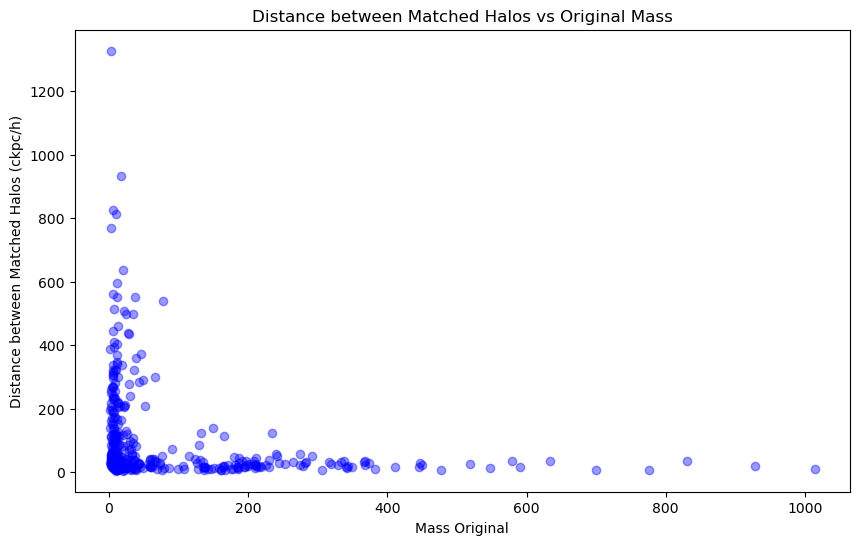

In [6]:
#graficar la distancia entre los halos emparejados vs la masa original
plt.figure(figsize=(10, 6))
plt.scatter(data_best['mass_original'].astype(float), data_best['distance_ckpc/h'].astype(float),color='b' ,alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Distance between Matched Halos (ckpc/h)')
plt.title('Distance between Matched Halos vs Original Mass')
plt.show()

In [7]:
#ver cuantos id_match repetidos hay en data_best
data_best['id_match'].value_counts()[data_best['id_match'].value_counts() > 1]

id_match
1836     5
13824    4
7792     4
11581    3
7206     3
        ..
5505     2
3433     2
13474    2
13239    2
3430     2
Name: count, Length: 62, dtype: int64

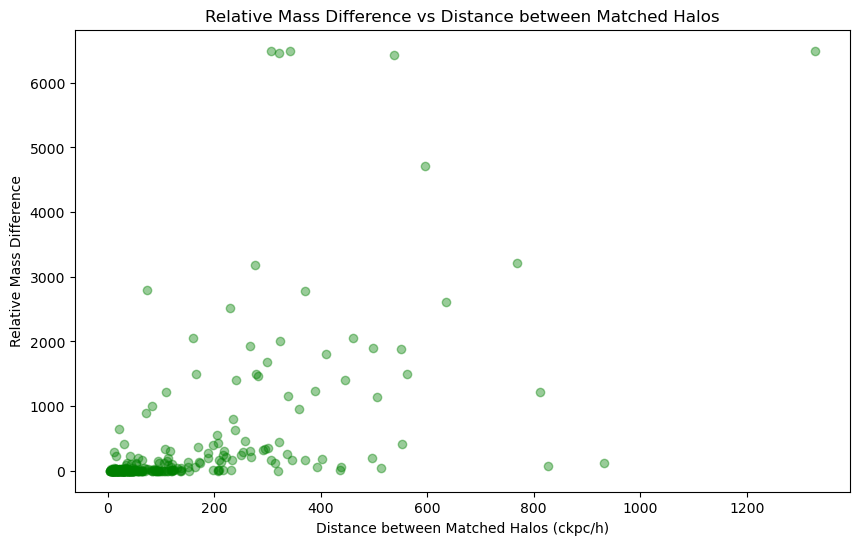

In [8]:
#graficar distancia vs diferencia de masa relativa
plt.figure(figsize=(10, 6))
plt.scatter(data_best['distance_ckpc/h'].astype(float), data_best['diff_mass'].astype(float),color='g' ,alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Distance between Matched Halos (ckpc/h)')
plt.ylabel('Relative Mass Difference')
plt.title('Relative Mass Difference vs Distance between Matched Halos')
plt.show()

In [9]:
# Ordenar el DataFrame por 'id' y 'diff_mass' para tener los matches con menor diferencia de masa primero
data_bymass = data.sort_values(by=['id', 'diff_mass'])

# Mostrar las primeras filas para verificar que los matches están ordenados por diferencia de masa
data_bymass.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,diff_mass
1861,8,4,31.240942,32.879517,17.85853385925293,1.638575
1865,8,13826,31.240942,9.162122,4255.708984375,22.078820
1864,8,13827,31.240942,7.371743,4175.52001953125,23.869199
1863,8,13824,31.240942,125.000717,4134.13671875,93.759775
1862,8,0,31.240942,14055.145508,889.7453002929688,14023.904566


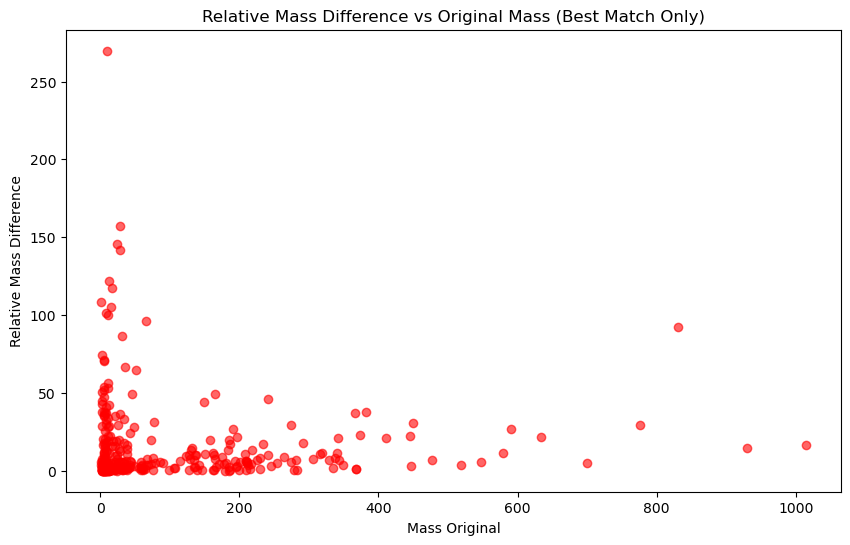

In [10]:
# Filter to keep only the first match (best match) for each original subhalo
data_best_bymass = data_bymass.drop_duplicates(subset='id', keep='first')

plt.figure(figsize=(10, 6))
plt.scatter(data_best_bymass['mass_original'], data_best_bymass['diff_mass'], color='r', alpha=0.6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Relative Mass Difference')
plt.title('Relative Mass Difference vs Original Mass (Best Match Only)')
plt.show()

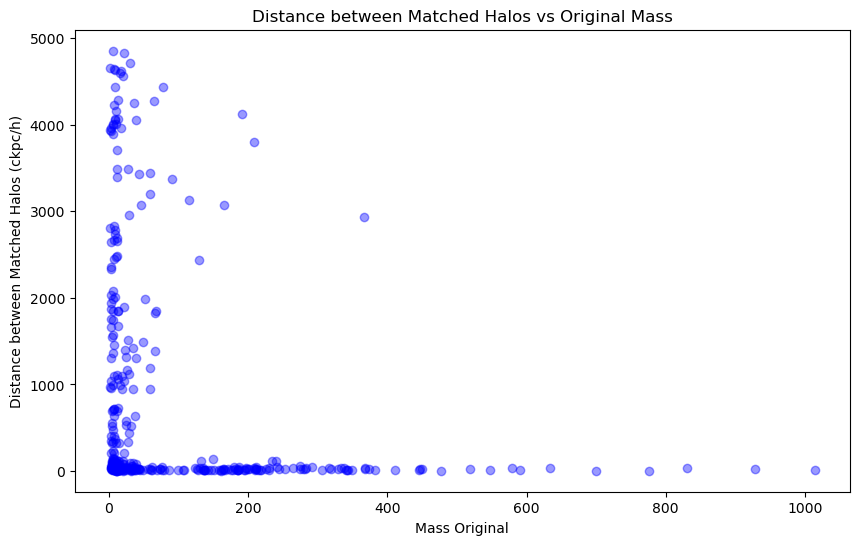

In [11]:
#graficar la distancia entre los halos emparejados vs la masa original
plt.figure(figsize=(10, 6))
plt.scatter(data_best_bymass['mass_original'].astype(float), data_best_bymass['distance_ckpc/h'].astype(float),color='b' ,alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Distance between Matched Halos (ckpc/h)')
plt.title('Distance between Matched Halos vs Original Mass')
plt.show()

## Prueba 2: con función de coste

### Con disco

In [12]:
path = "results/sphere_match_list_results_cost.txt"
# txt columnas separadas por espacio y tienen nombre id id_match mass_original mass_match distance_ckpc/h shared_fraction
data_c = pd.read_csv(path, sep=" ", names=["id", "id_match", "mass_original", "mass_match", "distance_ckpc/h", "shared_frac"])
#quitar primera fila
data_c = data_c.iloc[1:]

#convertir columnas mass_original y mass_match a float
data_c['mass_original'] = data_c['mass_original'].astype(float)
data_c['mass_match'] = data_c['mass_match'].astype(float)
data_c['shared_frac']
#convertir las dos primeras columnas a int
data_c['id'] = data_c['id'].astype(int)
data_c['id_match'] = data_c['id_match'].astype(int)

# Calcular la diferencia de masa relativa
data_c['diff_mass'] = np.abs(data_c['mass_original'] - data_c['mass_match'])/data_c['mass_original']

data_c.head()


,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1,117251,3431,365.970703,324.060211,32.162353515625,0.0724,0.114519
2,117251,3435,365.970703,52.869431,849.8848266601562,0.0114,0.855536
3,117251,3430,365.970703,3208.470459,845.8616333007812,0.1588,7.767014
4,117251,3438,365.970703,24.836105,1064.44677734375,0.0050,0.932136
5,117251,3432,365.970703,83.478668,1200.50390625,0.0147,0.771898


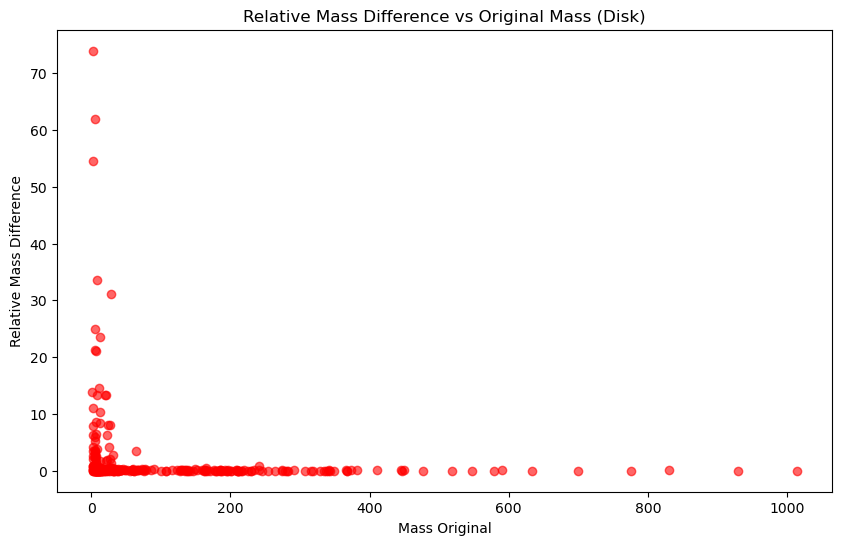

In [13]:
# Filter to keep only the first match (best match) for each original subhalo
data_c_best = data_c.drop_duplicates(subset='id', keep='first')

plt.figure(figsize=(10, 6))
plt.scatter(data_c_best['mass_original'], data_c_best['diff_mass'], color='r', alpha=0.6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Relative Mass Difference')
plt.title('Relative Mass Difference vs Original Mass (Disk)')
plt.show()

In [14]:
len(data_c_best)

377

In [15]:
#que match ids están repetidos en data_best 
data_c_best['id_match'].value_counts()[data_c_best['id_match'].value_counts() > 1]

id_match
4253     4
9069     3
8729     3
13512    3
13393    3
7795     3
8345     2
3431     2
4254     2
4251     2
13715    2
14107    2
13746    2
13303    2
10733    2
1844     2
10136    2
6594     2
1837     2
14507    2
7206     2
7210     2
12959    2
12028    2
13240    2
5505     2
9068     2
11463    2
11462    2
11233    2
12206    2
13857    2
8886     2
11717    2
3435     2
8520     2
Name: count, dtype: int64

In [16]:
#subhalos con match 1-1, es decir con id_match que no se repite en data_c_best
data_1to1 = data_c_best[data_c_best['id_match'].map(data_c_best['id_match'].value_counts()) == 1]
data_1to1

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
6,117254,3433,69.157051,65.467628,8.563726425170898,0.1027,0.053348
16,117256,3434,28.094795,65.670395,777.6536865234375,0.0037,1.337458
21,117257,3436,35.623722,37.527054,37.79806137084961,0.1064,0.053429
26,117258,3432,26.914675,83.478668,437.6359558105469,0.0143,2.101604
31,117260,3438,20.640560,24.836105,12.634193420410156,0.0673,0.203267
...,...,...,...,...,...,...,...
1861,8,4,31.240942,32.879517,17.85853385925293,0.0672,0.052450
1866,96763,2794,106.858688,105.082573,17.46335220336914,0.3805,0.016621
1871,96765,2796,41.040714,39.090000,26.782188415527344,0.1148,0.047531
1876,96773,2797,11.956222,32.504471,605.583984375,0.0017,1.718624


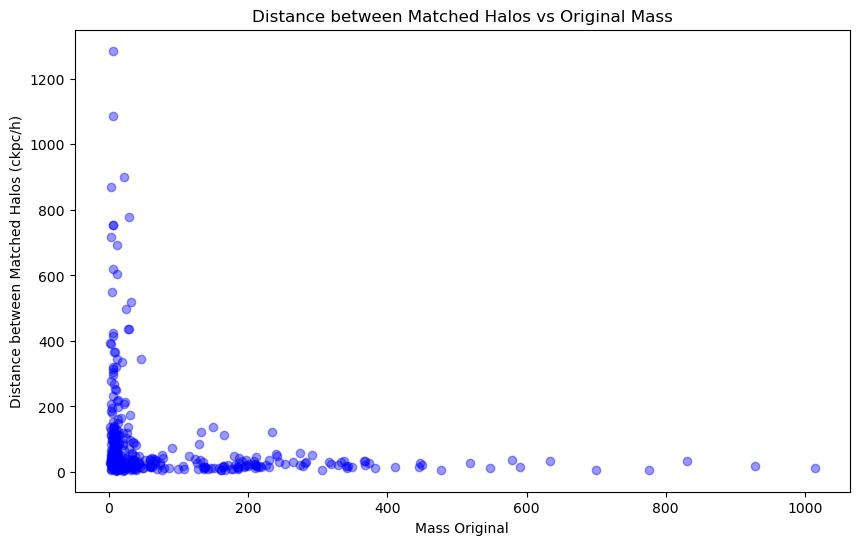

In [17]:
#graficar la distancia entre los halos emparejados vs la masa original
plt.figure(figsize=(10, 6))
plt.scatter(data_c_best['mass_original'].astype(float), data_c_best['distance_ckpc/h'].astype(float),color='b' ,alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Distance between Matched Halos (ckpc/h)')
plt.title('Distance between Matched Halos vs Original Mass')
plt.show()

### Sin disco

In [18]:
path = "results/sphere_match_list_results_cost_nodisk.txt"
# txt columnas separadas por espacio y tienen nombre id id_match mass_original mass_match distance_ckpc/h shared_fraction
data_n = pd.read_csv(path, sep=" ", names=["id", "id_match", "mass_original", "mass_match", "distance_ckpc/h", "shared_frac"])
#quitar primera fila
data_n = data_n.iloc[1:]

#convertir columnas mass_original y mass_match a float
data_n['mass_original'] = data_n['mass_original'].astype(float)
data_n['mass_match'] = data_n['mass_match'].astype(float)
data_n['shared_frac']
#convertir las dos primeras columnas a int
data_n['id'] = data_n['id'].astype(int)
data_n['id_match'] = data_n['id_match'].astype(int)

# Calcular la diferencia de masa relativa
data_n['diff_mass'] = np.abs(data_n['mass_original'] - data_n['mass_match'])/data_n['mass_original']

data_n.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1,57,54,4.990088,4.717397,20.950796127319336,0.0911,0.054646
2,57,26509,4.990088,2.769305,801.105224609375,0.0057,0.445039
3,57,574,4.990088,0.207138,1044.6148681640625,0.0041,0.958490
4,57,602,4.990088,0.189195,1177.165283203125,0.0037,0.962086
5,57,0,4.990088,14055.145508,1093.6424560546875,0.2669,2815.613032


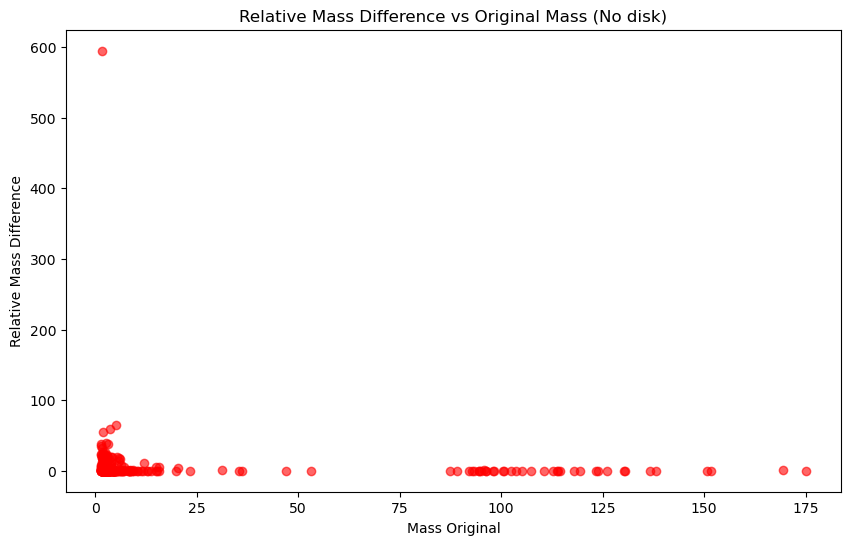

In [19]:
# Filter to keep only the first match (best match) for each original subhalo
data_n_best = data_n.drop_duplicates(subset='id', keep='first')

plt.figure(figsize=(10, 6))
plt.scatter(data_n_best['mass_original'], data_n_best['diff_mass'], color='r', alpha=0.6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Relative Mass Difference')
plt.title('Relative Mass Difference vs Original Mass (No disk)')
plt.show()

In [20]:
len(data_n_best)

377

In [21]:
#mostrar el subhalo con mayor diferencia de masa relativa
data_n_best.loc[data_n_best['diff_mass'].idxmax()]

#ver el top 5 de ese halo en el DataFrame original
data_n[data_n['id'] == data_n_best.loc[data_n_best['diff_mass'].idxmax()]['id']].head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1814,300907,8885,1.731768,1031.989746,14.80455207824707,0.5914,594.916690
1815,300907,8887,1.731768,18.998901,450.2303161621094,0.0144,9.970809
1816,300907,14833,1.731768,169.516159,1450.3455810546875,0.1167,96.886155
1817,300907,20320,1.731768,17.767145,1482.1412353515625,0.0136,9.259538
1818,300907,19717,1.731768,22.254208,1962.352783203125,0.0034,11.850567


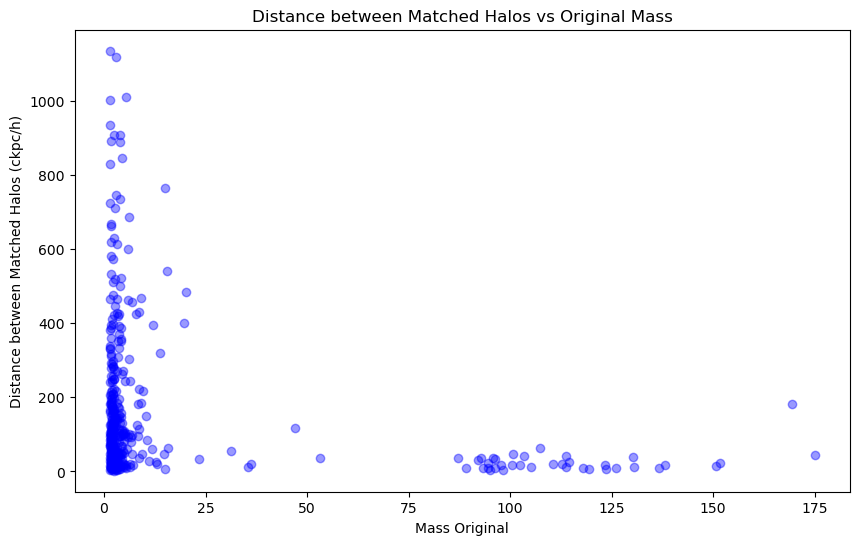

In [22]:
#graficar la distancia entre los halos emparejados vs la masa original
plt.figure(figsize=(10, 6))
plt.scatter(data_n_best['mass_original'].astype(float), data_n_best['distance_ckpc/h'].astype(float),color='b' ,alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mass Original')
plt.ylabel('Distance between Matched Halos (ckpc/h)')
plt.title('Distance between Matched Halos vs Original Mass')
plt.show()

In [23]:
path = "../../results/disk_3_subhalo_properties.csv"
data_disk_3 = pd.read_csv(path)

path = "../../results/disk_1_subhalo_properties.csv"
data_disk_1 = pd.read_csv(path)

In [24]:
data_disk_3.head()

,SubhaloID,GasMass,StellarMass,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloSpin_mag,SubhaloVelDisp,SubhaloVmax,SubhaloVmaxRad
0,3436,1.663366,0.741450,-142.022460,989.29877,-585.416560,1158.27250,73.184950,137.01610,14.833361
1,3432,0.418254,5.329387,281.634400,91.59876,295.181060,418.13890,120.037930,242.63090,3.182418
2,3438,2.682003,0.549658,-604.511500,-735.07560,-121.892490,959.49365,84.386154,145.34521,20.286093
3,3443,0.362931,0.575376,-141.250500,-283.48022,-59.866367,322.33014,69.901660,129.47948,3.954746
4,3452,0.148799,0.713935,-28.891573,51.07908,107.332260,122.32747,77.296650,129.91100,6.344748


In [25]:
data_disk_1.head()

,SubhaloID,GasMass,StellarMass,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloSpin_mag,SubhaloVelDisp,SubhaloVmax,SubhaloVmaxRad
0,117257,1.691952,1.492844,-36.138615,867.079285,-656.226135,1088.009766,77.720802,151.421234,12.982916
1,117258,0.812323,2.220027,247.027710,260.790527,84.394173,368.994263,86.764320,198.650635,1.243768
2,117260,2.554057,1.409675,-498.394531,-532.338562,-436.322723,849.799377,88.027351,152.301956,16.486126
3,117264,0.981715,1.036441,-337.803375,-410.704651,-193.453476,565.874268,79.653267,141.098465,0.964807
4,117265,0.854048,1.472428,-87.216484,161.866074,221.749802,288.063049,85.464058,153.815674,5.787958


In [26]:
data_1to1.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
6,117254,3433,69.157051,65.467628,8.563726425170898,0.1027,0.053348
16,117256,3434,28.094795,65.670395,777.6536865234375,0.0037,1.337458
21,117257,3436,35.623722,37.527054,37.79806137084961,0.1064,0.053429
26,117258,3432,26.914675,83.478668,437.6359558105469,0.0143,2.101604
31,117260,3438,20.640560,24.836105,12.634193420410156,0.0673,0.203267


In [27]:
# Renombrar columnas de data_disk_3 para distinguir que son del match
data_disk_3_renamed = data_disk_3.add_suffix('_match')

# Unir data_1to1 con data_disk_3_renamed usando id_match y SubhaloID_match
data_full = pd.merge(data_1to1, data_disk_3_renamed, left_on='id_match', right_on='SubhaloID_match', how='left')

# Unir con data_disk_1 usando id y SubhaloID
# Las columnas de data_disk_1 mantendrán su nombre original (representando el subhalo original)
data_full = pd.merge(data_full, data_disk_1, left_on='id', right_on='SubhaloID', how='left')

data_full.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass,SubhaloID_match,GasMass_match,StellarMass_match,...,SubhaloID,GasMass,StellarMass,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloSpin_mag,SubhaloVelDisp,SubhaloVmax,SubhaloVmaxRad
0,117254,3433,69.157051,65.467628,8.563726425170898,0.1027,0.053348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117256,3434,28.094795,65.670395,777.6536865234375,0.0037,1.337458,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117257,3436,35.623722,37.527054,37.79806137084961,0.1064,0.053429,3436.0,1.663366,0.741450,...,117257.0,1.691952,1.492844,-36.138615,867.079285,-656.226135,1088.009766,77.720802,151.421234,12.982916
3,117258,3432,26.914675,83.478668,437.6359558105469,0.0143,2.101604,3432.0,0.418254,5.329387,...,117258.0,0.812323,2.220027,247.027710,260.790527,84.394173,368.994263,86.764320,198.650635,1.243768
4,117260,3438,20.640560,24.836105,12.634193420410156,0.0673,0.203267,3438.0,2.682003,0.549658,...,117260.0,2.554057,1.409675,-498.394531,-532.338562,-436.322723,849.799377,88.027351,152.301956,16.486126


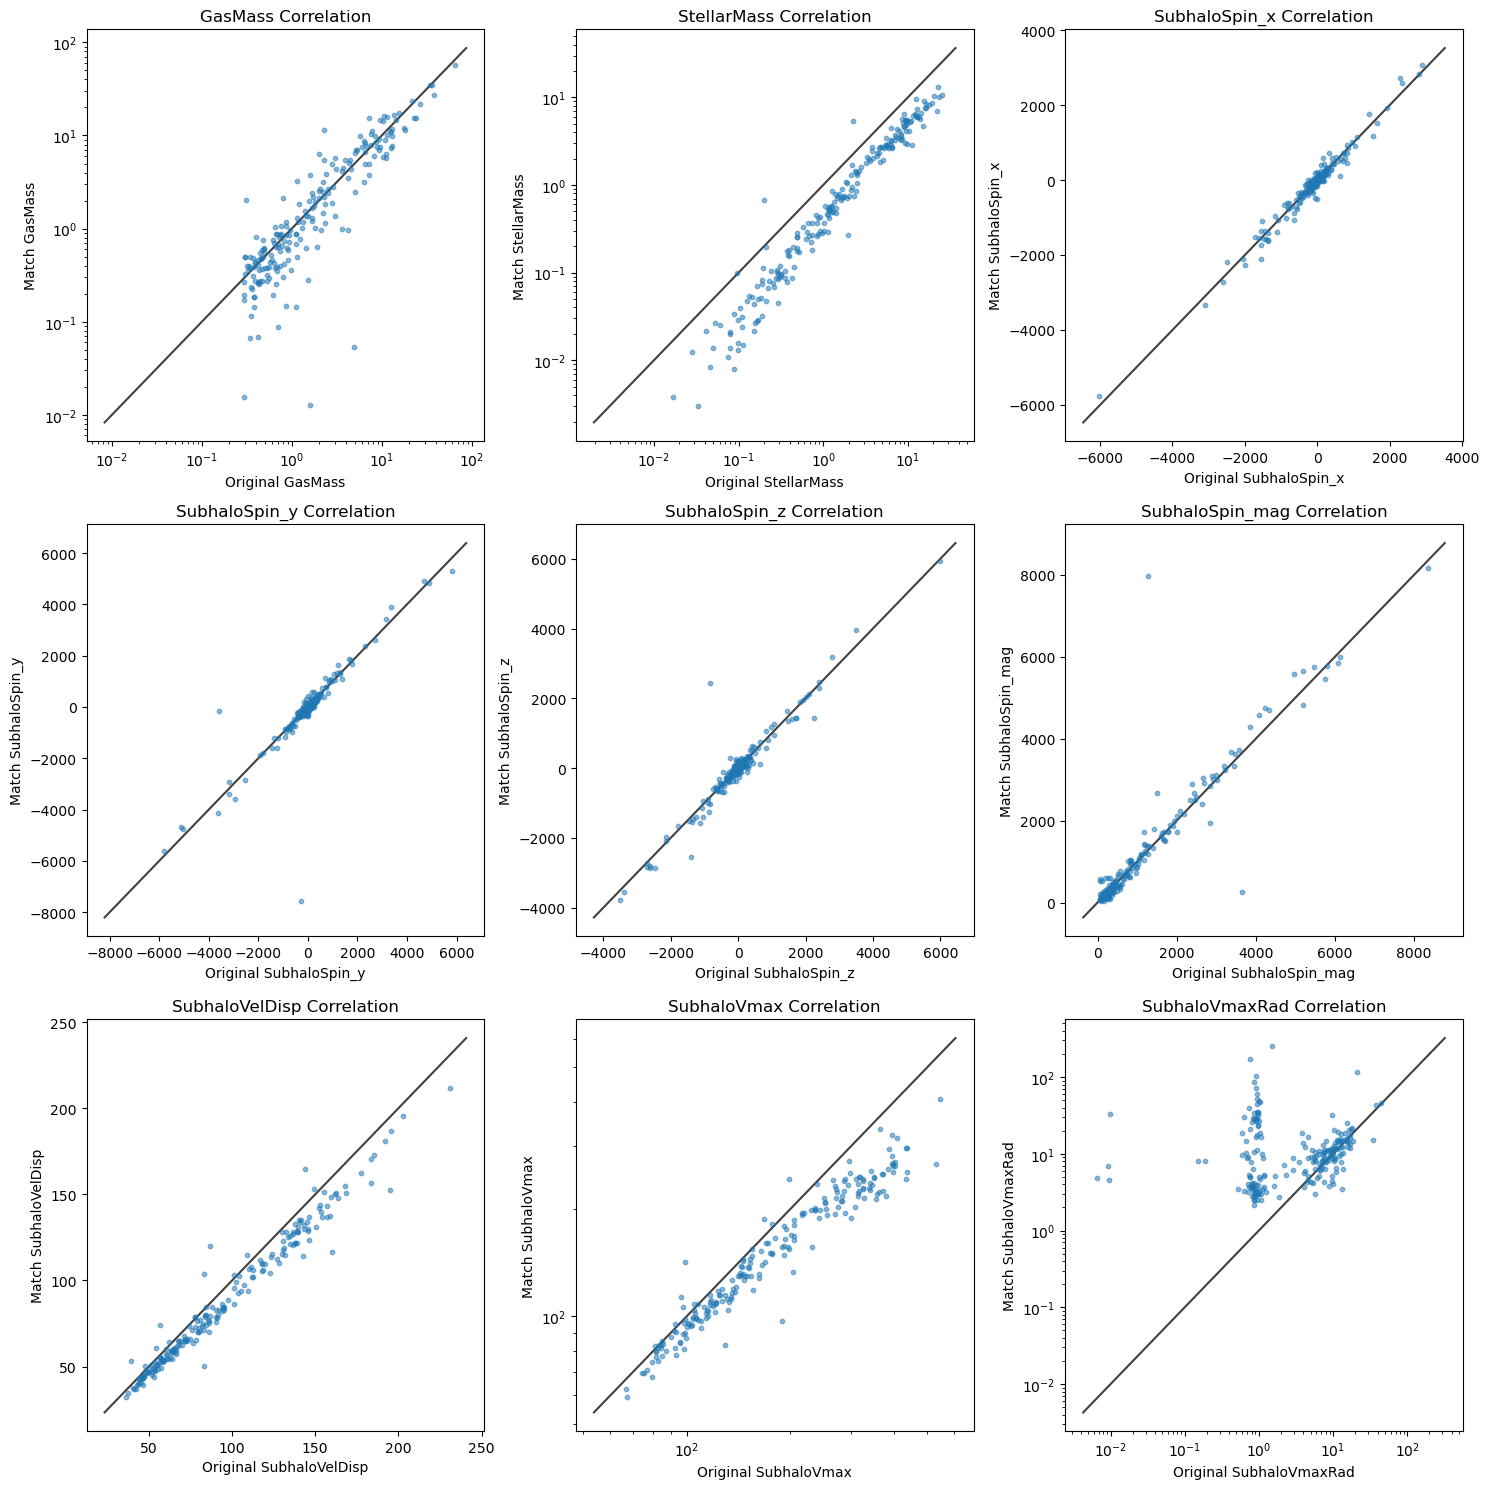

In [28]:
# List of properties to correlate (excluding IDs and mass which we already looked at)
properties = ['GasMass', 'StellarMass', 'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z', 
              'SubhaloSpin_mag', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, prop in enumerate(properties):
    # Original property name vs Match property name
    prop_match = prop + '_match'
    
    ax = axes[i]
    ax.scatter(data_full[prop], data_full[prop_match], alpha=0.5, s=10)
    
    # Set log scale for masses and Vmax related properties if appropriate, 
    # or just linear if data contains negatives (like Spin components)
    if 'Mass' in prop or 'Vmax' in prop:
        ax.set_xscale('log')
        ax.set_yscale('log')
        
    ax.set_xlabel(f'Original {prop}')
    ax.set_ylabel(f'Match {prop}')
    ax.set_title(f'{prop} Correlation')
    
    # Add a 1:1 line for reference
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

plt.tight_layout()
plt.show()

Total puntos: 298
Outliers encontrados (Spin diff > 500): 9


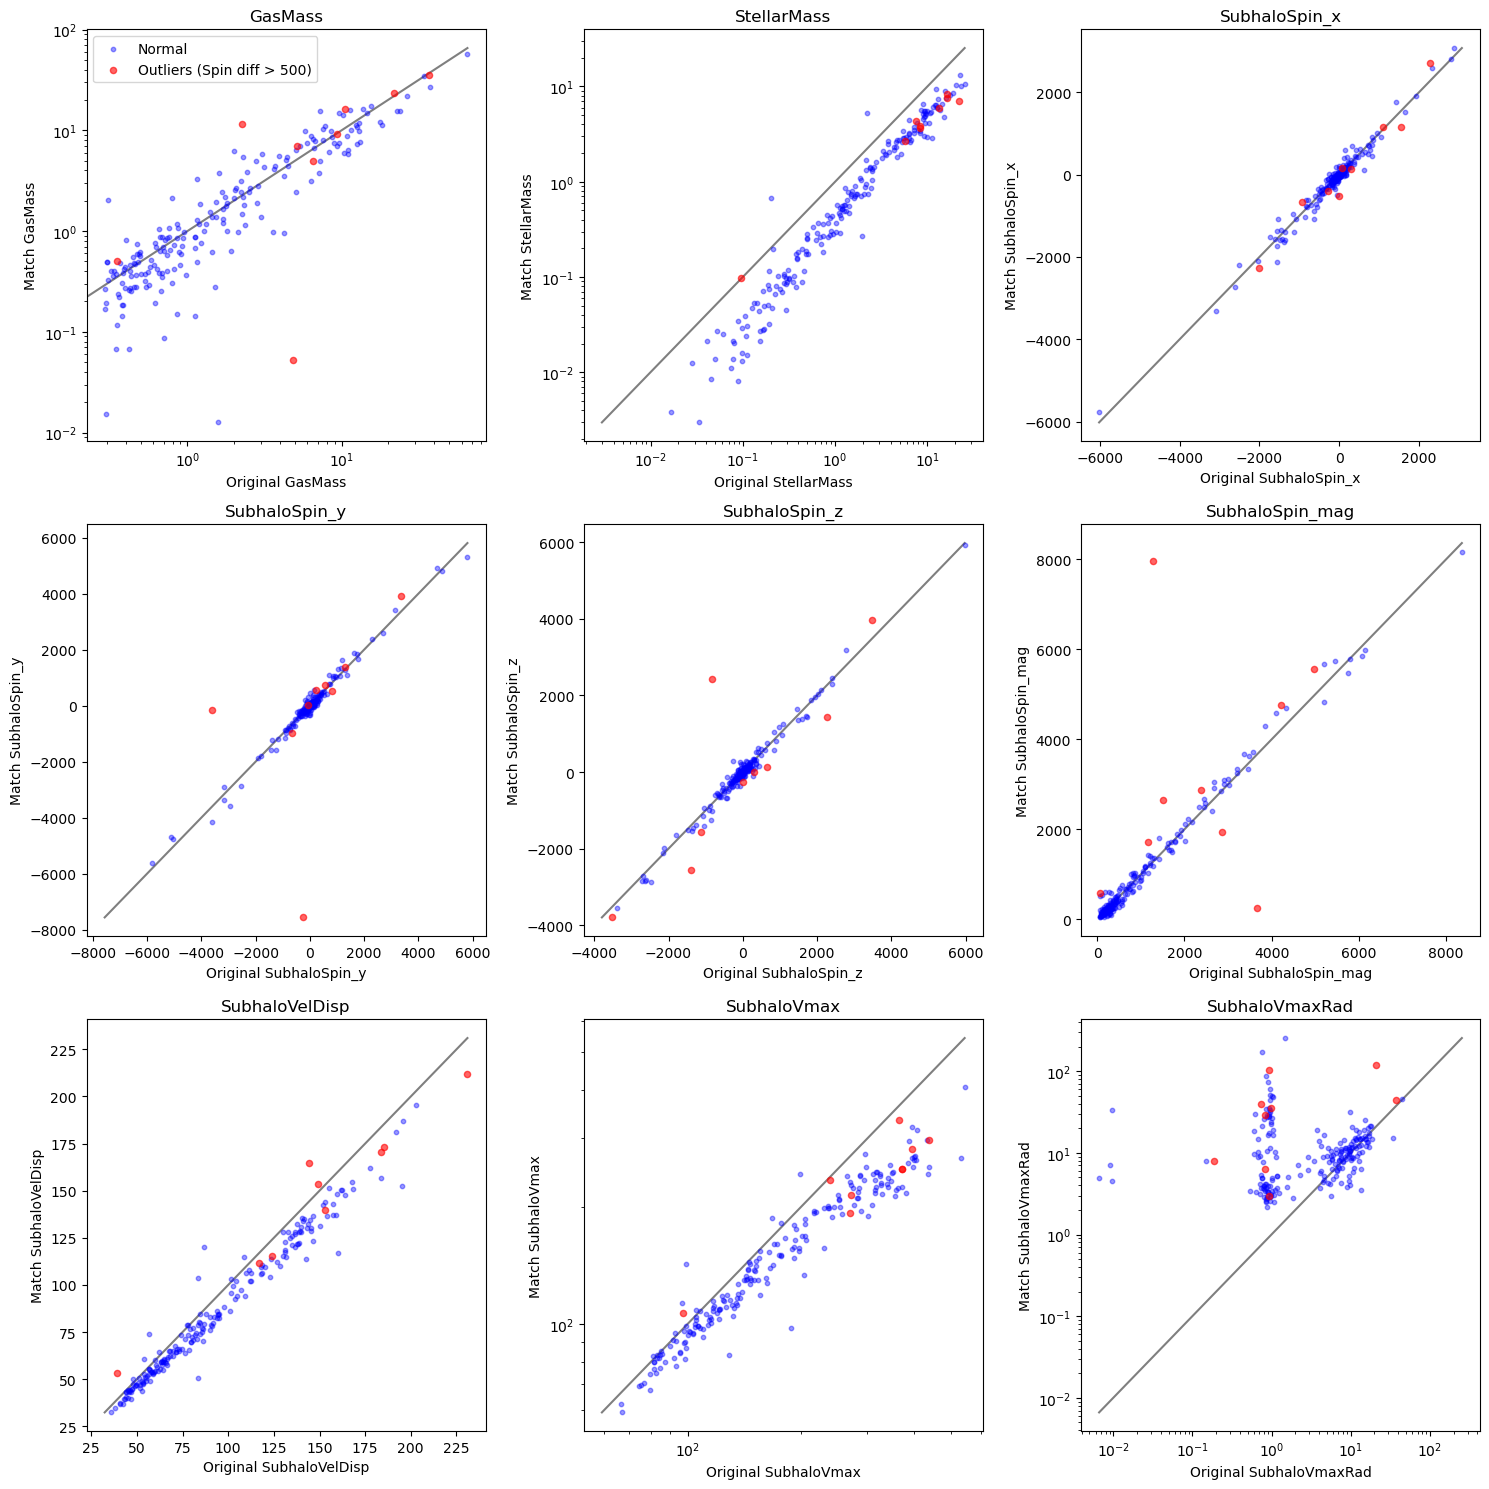

In [29]:
# Definir outliers basados en la magnitud del spin (SubhaloSpin_mag)
# Usamos una máscara sobre todo el dataset data_full
# Calcular diferencia absoluta
abs_diff = np.abs(data_full['SubhaloSpin_mag'] - data_full['SubhaloSpin_mag_match'])

# Umbral: diferencia de 500 (basado en el percentil 93 aprox)
threshold = 500
outliers_mask = abs_diff > threshold

# Separar datos para graficar
outliers = data_full[outliers_mask]
non_outliers = data_full[~outliers_mask]

print(f"Total puntos: {len(data_full)}")
print(f"Outliers encontrados (Spin diff > {threshold}): {len(outliers)}")

# Graficar
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, prop in enumerate(properties):
    prop_match = prop + '_match'
    ax = axes[i]
    
    # 1. Graficar puntos normales
    ax.scatter(non_outliers[prop], non_outliers[prop_match], alpha=0.4, s=10, color='blue', label='Normal')
    
    # 2. Graficar outliers en rojo
    ax.scatter(outliers[prop], outliers[prop_match], alpha=0.6, s=20, color='red', label=f'Outliers (Spin diff > {threshold})')
    
    # Mantener la escala logarítmica original (solo Mass y Vmax)
    if 'Mass' in prop or 'Vmax' in prop:
        ax.set_xscale('log')
        ax.set_yscale('log')
        
    ax.set_xlabel(f'Original {prop}')
    ax.set_ylabel(f'Match {prop}')
    ax.set_title(f'{prop}')
    
    # Línea 1:1
    all_vals_x = data_full[prop]
    all_vals_y = data_full[prop_match]
    
    min_val = min(all_vals_x.min(), all_vals_y.min())
    max_val = max(all_vals_x.max(), all_vals_y.max())
    
    ax.plot([min_val, max_val], [min_val, max_val], 'k-', alpha=0.5, zorder=0)
    
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

## Prueba 3: Función de coste con spin y disp vel

In [30]:
path = "../../results/disk_sphere_match_list_results.txt"
# txt columnas separadas por espacio y tienen nombre id id_match mass_original mass_match distance_ckpc/h shared_fraction
data_c = pd.read_csv(path, sep=" ", names=["id", "id_match", "mass_original", "mass_match", "distance_ckpc/h", "shared_frac"])
#quitar primera fila
data_c = data_c.iloc[1:]

#convertir columnas mass_original y mass_match a float
data_c['mass_original'] = data_c['mass_original'].astype(float)
data_c['mass_match'] = data_c['mass_match'].astype(float)
data_c['shared_frac']
#convertir las dos primeras columnas a int
data_c['id'] = data_c['id'].astype(int)
data_c['id_match'] = data_c['id_match'].astype(int)

# Calcular la diferencia de masa relativa
data_c['diff_mass'] = np.abs(data_c['mass_original'] - data_c['mass_match'])/data_c['mass_original']

data_c.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1,117251,3431,365.970703,324.060211,32.162353515625,0.0724,0.114519
2,117251,3435,365.970703,52.869431,849.8848266601562,0.0114,0.855536
3,117251,3438,365.970703,24.836105,1064.44677734375,0.0050,0.932136
4,117251,3430,365.970703,3208.470459,845.8616333007812,0.1588,7.767014
5,117251,3432,365.970703,83.478668,1200.50390625,0.0147,0.771898


In [31]:
# Filter to keep only the first match (best match) for each original subhalo
data_best = data_c.drop_duplicates(subset='id', keep='first')

In [32]:
#que match ids están repetidos en data_best 
data_best['id_match'].value_counts()[data_best['id_match'].value_counts() > 1]

id_match
4253     4
13393    3
8729     3
7795     3
9069     3
13512    3
8345     2
1837     2
11772    2
4254     2
6594     2
10733    2
13715    2
14107    2
3435     2
3431     2
13303    2
10136    2
12028    2
1844     2
4251     2
11717    2
13240    2
9068     2
5505     2
11463    2
11462    2
8886     2
12206    2
13857    2
7210     2
7206     2
14507    2
8520     2
12959    2
Name: count, dtype: int64

In [33]:
#que match ids están repetidos en data_best 
data_best['id_match'].value_counts()[data_best['id_match'].value_counts() > 1]
#subhalos con match 1-1, es decir con id_match que no se repite en data_best
data_1to1 = data_best[data_best['id_match'].map(data_best['id_match'].value_counts()) == 1]
data_1to1

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
6,117254,3433,69.157051,65.467628,8.563726425170898,0.1027,0.053348
16,117256,3434,28.094795,65.670395,777.6536865234375,0.0037,1.337458
21,117257,3436,35.623722,37.527054,37.79806137084961,0.1064,0.053429
26,117258,3432,26.914675,83.478668,437.6359558105469,0.0143,2.101604
31,117260,3438,20.640560,24.836105,12.634193420410156,0.0673,0.203267
...,...,...,...,...,...,...,...
1861,8,4,31.240942,32.879517,17.85853385925293,0.0672,0.052450
1866,96763,2794,106.858688,105.082573,17.46335220336914,0.3805,0.016621
1871,96765,2796,41.040714,39.090000,26.782188415527344,0.1148,0.047531
1876,96773,2797,11.956222,32.504471,605.583984375,0.0017,1.718624


In [34]:
data_1to1['id_match'].to_csv('results/matches_1to1.txt', sep=' ', index=False, header=False)
data_1to1['id'].to_csv('results/originals_1to1.txt', sep=' ', index=False, header=False)

In [46]:
#guardar en un csv id e id_match de data_1to1
data_1to1[['id', 'id_match']].to_csv('results/disk_tng501_tng503.txt', sep=' ', index=False, header=False)

In [35]:
path = "../../results/nodisk_sphere_match_list_results.txt"
# txt columnas separadas por espacio y tienen nombre id id_match mass_original mass_match distance_ckpc/h shared_fraction
data_n = pd.read_csv(path, sep=" ", names=["id", "id_match", "mass_original", "mass_match", "distance_ckpc/h", "shared_frac"])
#quitar primera fila
data_n = data_n.iloc[1:]

#convertir columnas mass_original y mass_match a float
data_n['mass_original'] = data_n['mass_original'].astype(float)
data_n['mass_match'] = data_n['mass_match'].astype(float)
data_n['shared_frac']
#convertir las dos primeras columnas a int
data_n['id'] = data_n['id'].astype(int)
data_n['id_match'] = data_n['id_match'].astype(int)

# Calcular la diferencia de masa relativa
data_n['diff_mass'] = np.abs(data_n['mass_original'] - data_n['mass_match'])/data_n['mass_original']

data_n.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1,57,54,4.990088,4.717397,20.950796127319336,0.0911,0.054646
2,57,26509,4.990088,2.769305,801.105224609375,0.0057,0.445039
3,57,574,4.990088,0.207138,1044.6148681640625,0.0041,0.958490
4,57,602,4.990088,0.189195,1177.165283203125,0.0037,0.962086
5,57,0,4.990088,14055.145508,1093.6424560546875,0.2669,2815.613032


In [36]:
# Filter to keep only the first match (best match) for each original subhalo
data_best_n = data_n.drop_duplicates(subset='id', keep='first')

In [37]:
#que match ids están repetidos en data_best_n 
data_best_n['id_match'].value_counts()[data_best_n['id_match'].value_counts() > 1]

id_match
2        5
3432     4
6864     2
14669    2
1840     2
2809     2
29       2
1838     2
7796     2
6602     2
10449    2
3478     2
7800     2
12288    2
7206     2
11963    2
2803     2
6876     2
7215     2
3445     2
21       2
1839     2
8520     2
23       2
15812    2
Name: count, dtype: int64

In [38]:
#que match ids están repetidos en data_best_n 
data_best_n['id_match'].value_counts()[data_best_n['id_match'].value_counts() > 1]
#subhalos con match 1-1, es decir con id_match que no se repite en data_best_n
data_1to1_n = data_best_n[data_best_n['id_match'].map(data_best_n['id_match'].value_counts()) == 1]
data_1to1_n.head()

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1,57,54,4.990088,4.717397,20.950796127319336,0.0911,0.054646
6,117312,3486,2.069130,2.479090,31.79369354248047,0.0534,0.198132
11,153,136,1.502250,1.355582,67.36243438720703,0.1190,0.097632
16,117282,3436,5.274940,37.527054,242.64002990722656,0.0002,6.114214
21,31,4,4.025313,32.879517,907.4223022460938,0.0029,7.168188


In [49]:
#ordenar por shared fraction descendente
data_1to1_n = data_1to1_n.sort_values(by='diff_mass', ascending=False)
data_1to1_n

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
1814,300907,8885,1.731768,1031.989746,14.80455207824707,0.5914,594.916690
1333,404818,11814,5.069699,336.553955,12.853808403015137,0.0019,65.385394
605,429473,13746,3.614765,215.495895,151.2786407470703,0.1384,58.615470
595,488531,14728,3.096392,121.102257,270.8804016113281,0.0482,38.110762
975,143921,4255,1.511537,54.752529,1134.241943359375,0.0281,35.223080
...,...,...,...,...,...,...,...
66,504559,15626,123.366493,123.756546,18.70331573486328,0.2160,0.003162
1666,96787,2818,6.658874,6.645785,78.50724029541016,0.2185,0.001966
1096,511304,15022,7.132715,7.136948,16.567873001098633,0.1922,0.000593
783,514272,15586,87.281952,87.326180,35.51951217651367,0.0706,0.000507


In [39]:
data_1to1_n['id_match'].to_csv('results/matches_nodisk_1to1.txt', sep=' ', index=False, header=False)
data_1to1_n['id'].to_csv('results/originals_nodisk_1to1.txt', sep=' ', index=False, header=False)

In [47]:
#guardar en un csv id e id_match de data_1to1
data_1to1_n[['id', 'id_match']].to_csv('results/nodisk_tng501_tng503.txt', sep=' ', index=False, header=False)

In [40]:
len(data_1to1_n)

322

In [41]:
path = "../../results/disk_3_subhalo_properties_2312.csv"
data_disk_3 = pd.read_csv(path)

path = "../../results/disk_1_subhalo_properties_2312.csv"
data_disk_1 = pd.read_csv(path)

In [42]:
data_disk_3.head()

,SubhaloID,GasMass,StellarMass,SubhaloSpin_x,SubhaloSpin_y,SubhaloSpin_z,SubhaloSpin_mag,SubhaloVelDisp,SubhaloVmax,SubhaloVmaxRad
0,3433,5.082347,2.211133,827.780700,-967.92600,-483.209200,1362.20140,112.130420,206.70912,8.753839
1,3434,0.000000,3.719232,33.211708,294.97950,4.037385,296.87070,120.789055,210.53406,15.602356
2,3436,1.663366,0.741450,-142.022460,989.29877,-585.416560,1158.27250,73.184950,137.01610,14.833361
3,3432,0.418254,5.329387,281.634400,91.59876,295.181060,418.13890,120.037930,242.63090,3.182418
4,3438,2.682003,0.549658,-604.511500,-735.07560,-121.892490,959.49365,84.386154,145.34521,20.286093


In [43]:
data_1to1

,id,id_match,mass_original,mass_match,distance_ckpc/h,shared_frac,diff_mass
6,117254,3433,69.157051,65.467628,8.563726425170898,0.1027,0.053348
16,117256,3434,28.094795,65.670395,777.6536865234375,0.0037,1.337458
21,117257,3436,35.623722,37.527054,37.79806137084961,0.1064,0.053429
26,117258,3432,26.914675,83.478668,437.6359558105469,0.0143,2.101604
31,117260,3438,20.640560,24.836105,12.634193420410156,0.0673,0.203267
...,...,...,...,...,...,...,...
1861,8,4,31.240942,32.879517,17.85853385925293,0.0672,0.052450
1866,96763,2794,106.858688,105.082573,17.46335220336914,0.3805,0.016621
1871,96765,2796,41.040714,39.090000,26.782188415527344,0.1148,0.047531
1876,96773,2797,11.956222,32.504471,605.583984375,0.0017,1.718624


In [44]:
# Renombrar columnas de data_disk_3 para distinguir que son del match
data_disk_3_renamed = data_disk_3.add_suffix('_match')

# Unir data_1to1 con data_disk_3_renamed usando id_match y SubhaloID_match
data_full = pd.merge(data_1to1, data_disk_3_renamed, left_on='id_match', right_on='SubhaloID_match', how='left')

# Unir con data_disk_1 usando id y SubhaloID
# Las columnas de data_disk_1 mantendrán su nombre original (representando el subhalo original)
data_full = pd.merge(data_full, data_disk_1, left_on='id', right_on='SubhaloID', how='left')


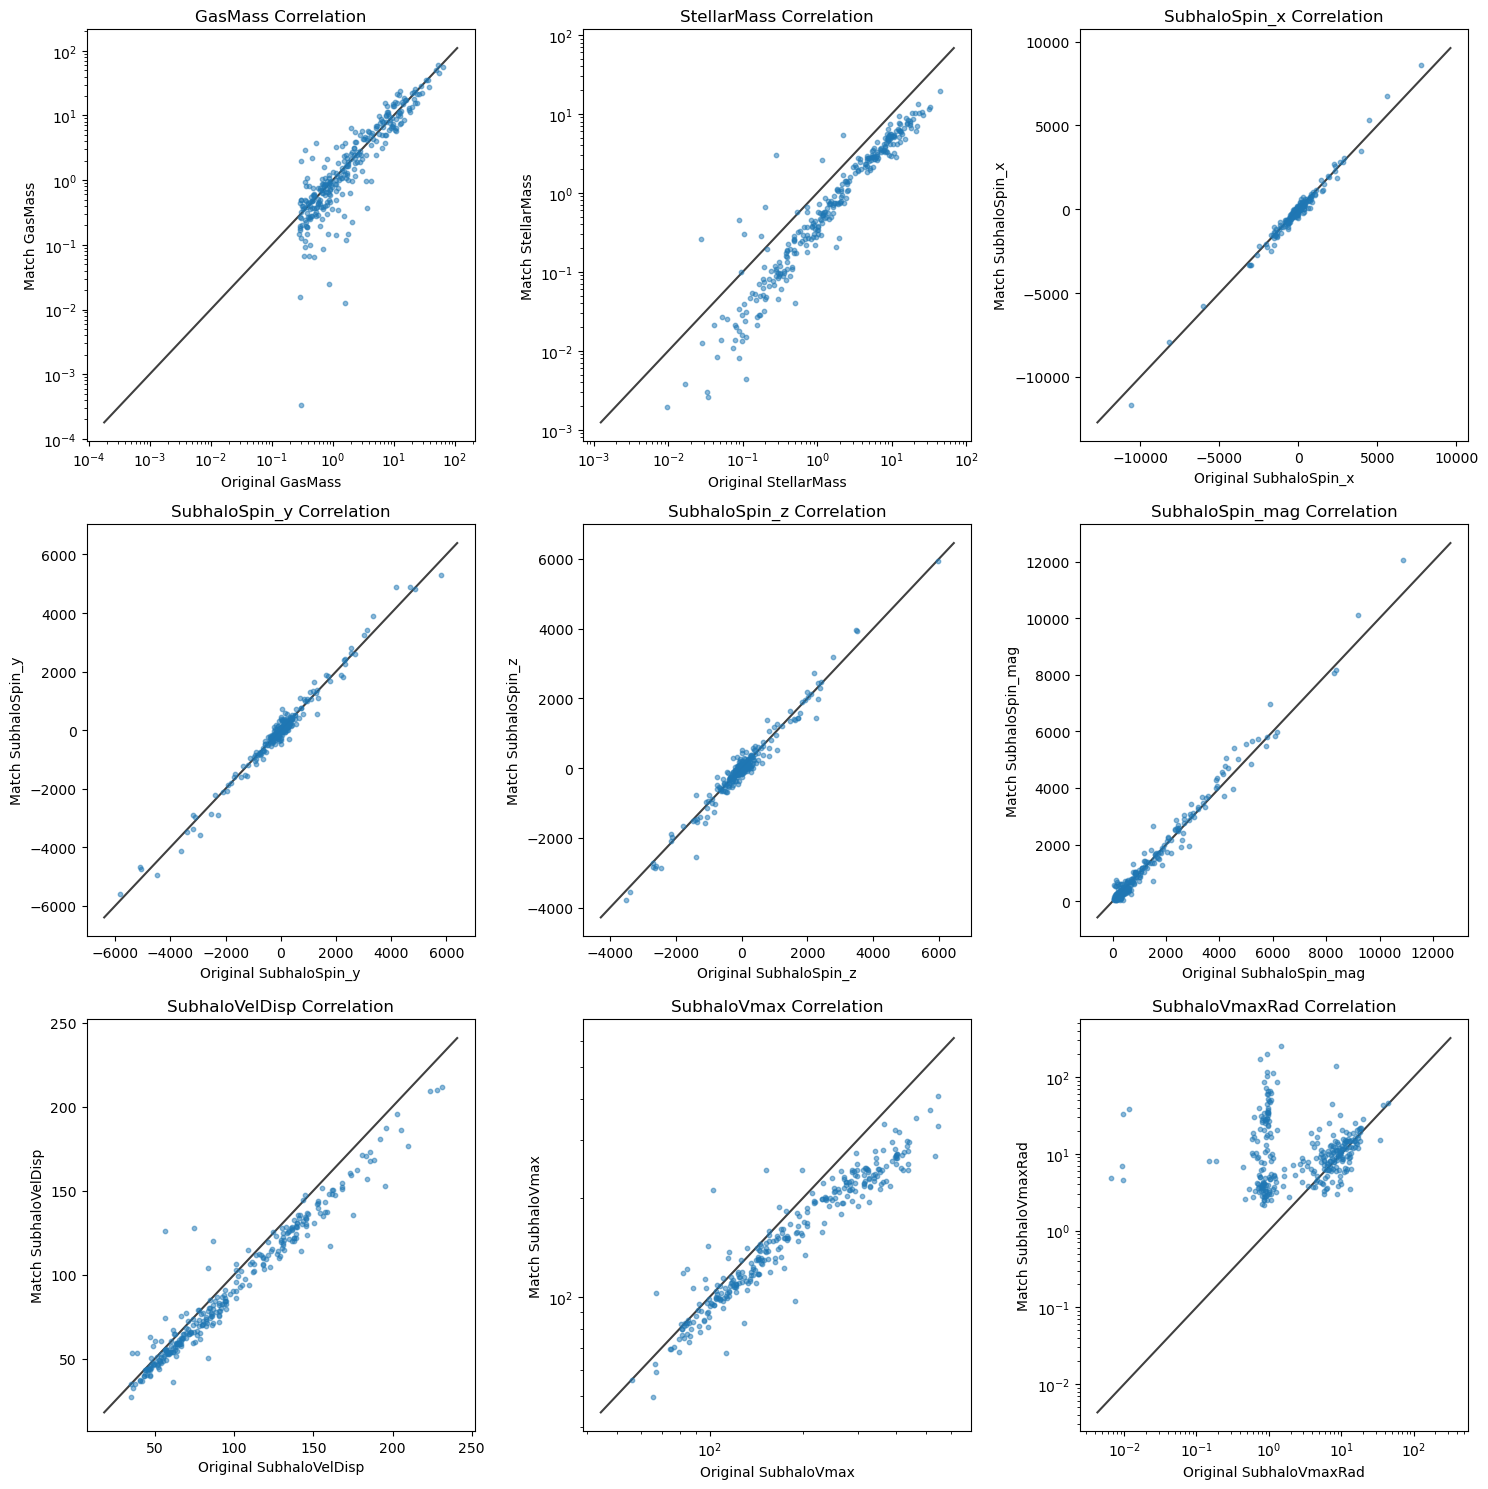

In [45]:
# List of properties to correlate (excluding IDs and mass which we already looked at)
properties = ['GasMass', 'StellarMass', 'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z', 
              'SubhaloSpin_mag', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, prop in enumerate(properties):
    # Original property name vs Match property name
    prop_match = prop + '_match'
    
    ax = axes[i]
    ax.scatter(data_full[prop], data_full[prop_match], alpha=0.5, s=10)
    
    # Set log scale for masses and Vmax related properties if appropriate, 
    # or just linear if data contains negatives (like Spin components)
    if 'Mass' in prop or 'Vmax' in prop:
        ax.set_xscale('log')
        ax.set_yscale('log')
        
    ax.set_xlabel(f'Original {prop}')
    ax.set_ylabel(f'Match {prop}')
    ax.set_title(f'{prop} Correlation')
    
    # Add a 1:1 line for reference
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

plt.tight_layout()
plt.show()